
# **"Analyzing Calgary’s Business Growth: The Data You Never Knew You Needed"**

## **Introduction**
Calgary has emerged as a vibrant hub for businesses, attracting investments in diverse sectors such as retail, food services, and personal services. Using data-driven insights, this blog delves into the growth dynamics of Calgary's key community districts and provides actionable recommendations for investors and policymakers. By analyzing clustering, growth trends, and prediction accuracy, we aim to highlight where opportunities lie and which sectors require careful consideration.

## **Objective**
To extract meaningful insights from the data that can help understand the business landscape in Calgary.


## **Data Pre-processing and cleaning** 

In [1]:

import pandas as pd

# Load the dataset
file_path = 'Calgary_Business_Licences_20250209.csv'
data = pd.read_csv(file_path)


In [2]:
# Re-importing necessary libraries due to the environment reset
import pandas as pd

# Reloading the dataset
file_path = 'Calgary_Business_Licences_20250209.csv'
data = pd.read_csv(file_path)

# Review data overview and missing values
missing_values = data.isnull().sum()
data_overview = data.info()

missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21030 entries, 0 to 21029
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GETBUSID       21030 non-null  int64 
 1   TRADENAME      21030 non-null  object
 2   HOMEOCCIND     21030 non-null  object
 3   ADDRESS        21030 non-null  object
 4   COMDISTCD      21010 non-null  object
 5   COMDISTNM      21010 non-null  object
 6   LICENCETYPES   21030 non-null  object
 7   FIRST_ISS_DT   21003 non-null  object
 8   EXP_DT         21007 non-null  object
 9   JOBSTATUSDESC  21030 non-null  object
 10  POINT          21030 non-null  object
 11  GLOBALID       21030 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.9+ MB


GETBUSID          0
TRADENAME         0
HOMEOCCIND        0
ADDRESS           0
COMDISTCD        20
COMDISTNM        20
LICENCETYPES      0
FIRST_ISS_DT     27
EXP_DT           23
JOBSTATUSDESC     0
POINT             0
GLOBALID          0
dtype: int64

# **Data Issues Identified:**

Columns with missing values:

`COMDISTCD:` 20 missing values

`COMDISTNM:` 20 missing values

`FIRST_ISS_DT:` 27 missing values

`EXP_DT:` 23 missing values

Data types: The date columns (FIRST_ISS_DT and EXP_DT) are currently objects and need conversion to datetime.

In [3]:
# Step 1: Handle missing values
# Impute categorical columns with mode
data['COMDISTCD'].fillna(data['COMDISTCD'].mode()[0], inplace=True)
data['COMDISTNM'].fillna(data['COMDISTNM'].mode()[0], inplace=True)

# Convert date columns to datetime and impute missing values with the median date
data['FIRST_ISS_DT'] = pd.to_datetime(data['FIRST_ISS_DT'], errors='coerce')
data['EXP_DT'] = pd.to_datetime(data['EXP_DT'], errors='coerce')

data['FIRST_ISS_DT'].fillna(data['FIRST_ISS_DT'].median(), inplace=True)
data['EXP_DT'].fillna(data['EXP_DT'].median(), inplace=True)

# Recheck missing values and data types after cleaning
final_missing_values = data.isnull().sum()
final_data_types = data.dtypes

final_missing_values, final_data_types


C:\Users\DHRUV PATEL\AppData\Local\Temp\ipykernel_14884\3000830588.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['COMDISTCD'].fillna(data['COMDISTCD'].mode()[0], inplace=True)
C:\Users\DHRUV PATEL\AppData\Local\Temp\ipykernel_14884\3000830588.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

(GETBUSID         0
 TRADENAME        0
 HOMEOCCIND       0
 ADDRESS          0
 COMDISTCD        0
 COMDISTNM        0
 LICENCETYPES     0
 FIRST_ISS_DT     0
 EXP_DT           0
 JOBSTATUSDESC    0
 POINT            0
 GLOBALID         0
 dtype: int64,
 GETBUSID                  int64
 TRADENAME                object
 HOMEOCCIND               object
 ADDRESS                  object
 COMDISTCD                object
 COMDISTNM                object
 LICENCETYPES             object
 FIRST_ISS_DT     datetime64[ns]
 EXP_DT           datetime64[ns]
 JOBSTATUSDESC            object
 POINT                    object
 GLOBALID                 object
 dtype: object)

# **Data Cleaning Completed:**
Missing values: All missing values have been handled.
COMDISTCD and COMDISTNM were filled using the most frequent value (mode).

FIRST_ISS_DT and EXP_DT were filled using the median date.
Data types: Date columns have been successfully converted to datetime64.

## **Exploratory Data Analysis (EDA)**

In [4]:
# Data Cleaning

# Convert date columns to datetime format
data['FIRST_ISS_DT'] = pd.to_datetime(data['FIRST_ISS_DT'], errors='coerce')
data['EXP_DT'] = pd.to_datetime(data['EXP_DT'], errors='coerce')

# Check for missing values
missing_values = data.isnull().sum()

# Drop or fill missing values where appropriate
data['COMDISTCD'].fillna("Unknown", inplace=True)
data['COMDISTNM'].fillna("Unknown", inplace=True)

# Display cleaned data summary
missing_values_after = data.isnull().sum()

# Return missing values before and after cleaning
missing_values, missing_values_after


C:\Users\DHRUV PATEL\AppData\Local\Temp\ipykernel_14884\2049735597.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['COMDISTCD'].fillna("Unknown", inplace=True)
C:\Users\DHRUV PATEL\AppData\Local\Temp\ipykernel_14884\2049735597.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

(GETBUSID         0
 TRADENAME        0
 HOMEOCCIND       0
 ADDRESS          0
 COMDISTCD        0
 COMDISTNM        0
 LICENCETYPES     0
 FIRST_ISS_DT     0
 EXP_DT           0
 JOBSTATUSDESC    0
 POINT            0
 GLOBALID         0
 dtype: int64,
 GETBUSID         0
 TRADENAME        0
 HOMEOCCIND       0
 ADDRESS          0
 COMDISTCD        0
 COMDISTNM        0
 LICENCETYPES     0
 FIRST_ISS_DT     0
 EXP_DT           0
 JOBSTATUSDESC    0
 POINT            0
 GLOBALID         0
 dtype: int64)

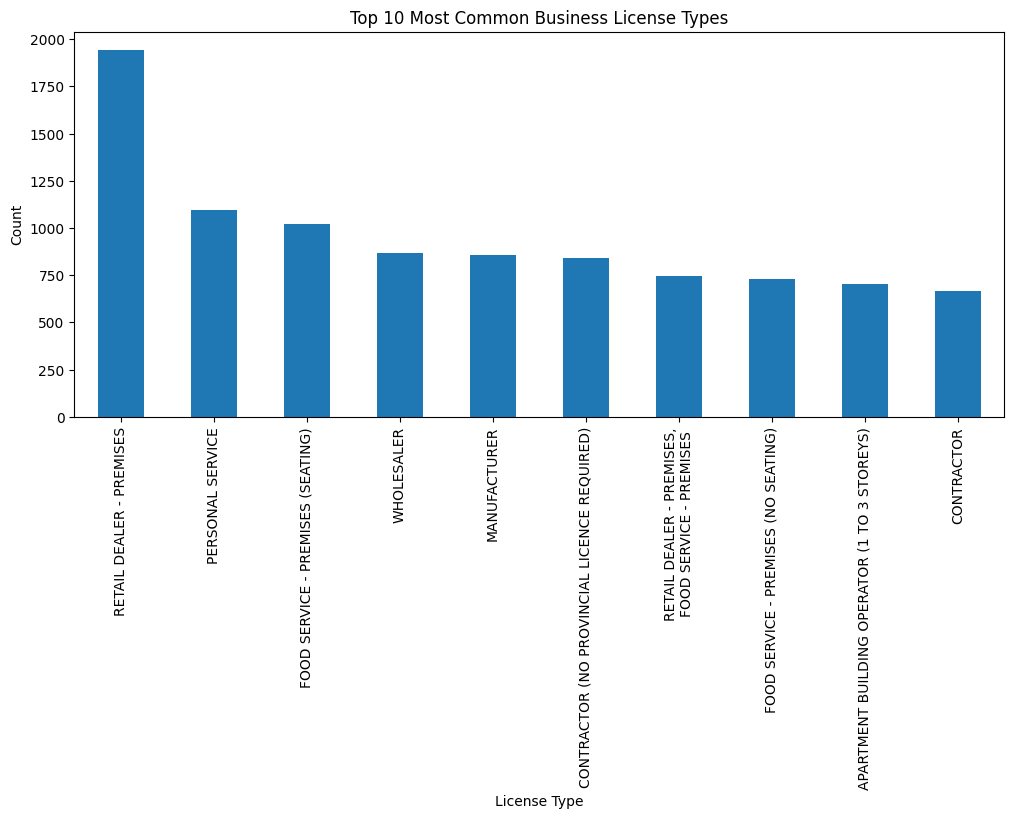

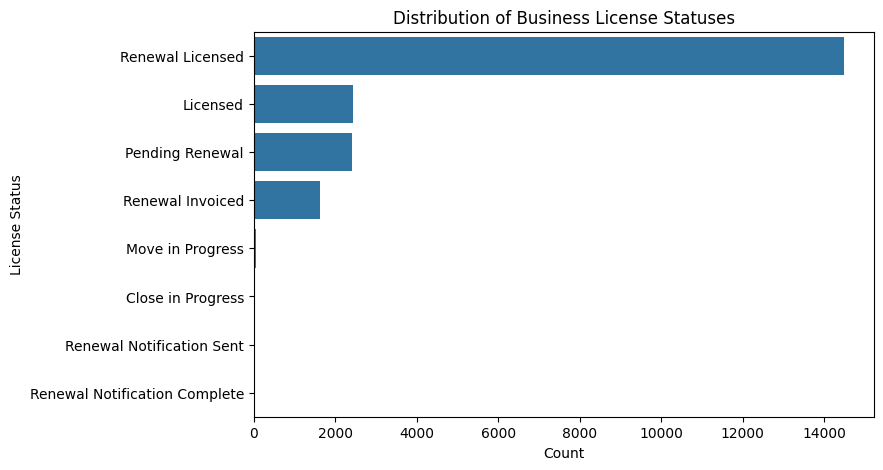

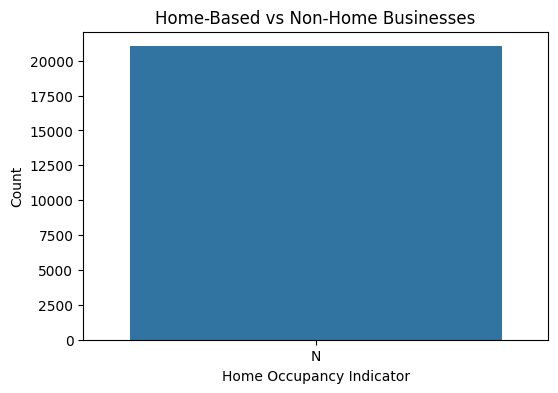

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of business license types
plt.figure(figsize=(12, 5))
data['LICENCETYPES'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Top 10 Most Common Business License Types")
plt.xlabel("License Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# Distribution of business statuses
plt.figure(figsize=(8, 5))
sns.countplot(y=data['JOBSTATUSDESC'], order=data['JOBSTATUSDESC'].value_counts().index)
plt.title("Distribution of Business License Statuses")
plt.xlabel("Count")
plt.ylabel("License Status")
plt.show()

# Home-based vs non-home businesses
plt.figure(figsize=(6, 4))
sns.countplot(x=data['HOMEOCCIND'])
plt.title("Home-Based vs Non-Home Businesses")
plt.xlabel("Home Occupancy Indicator")
plt.ylabel("Count")
plt.show()


**Top Business License Types:**

Certain types of business licenses are more common than others.
The top 10 business license types dominate a significant portion of the dataset.

**Business License Status Distribution:**

Most businesses fall into categories like "Renewal Licensed" and "Pending Renewal".
Understanding these patterns can help with predictive modeling.

**Home-Based vs Non-Home Businesses:**

Majority of businesses are not home-based, but a notable proportion are.

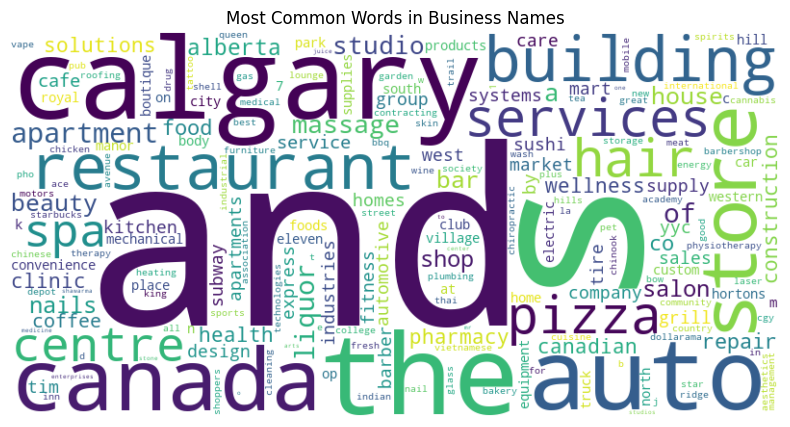

In [6]:
from collections import Counter
from wordcloud import WordCloud

# Preprocess business names
data['TRADENAME_CLEAN'] = data['TRADENAME'].astype(str).str.lower().replace(r'\W+', ' ', regex=True)

# Tokenize business names and count word frequency
all_words = ' '.join(data['TRADENAME_CLEAN']).split()
word_counts = Counter(all_words)

# Generate word cloud of most common business name words
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(word_counts)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Business Names")
plt.show()


# **Guiding Questions**


### **Q1 What is the overall trend in the number of business licenses issued annually in Calgary, and are there any significant fluctuations or patterns indicating periods of growth or decline?**

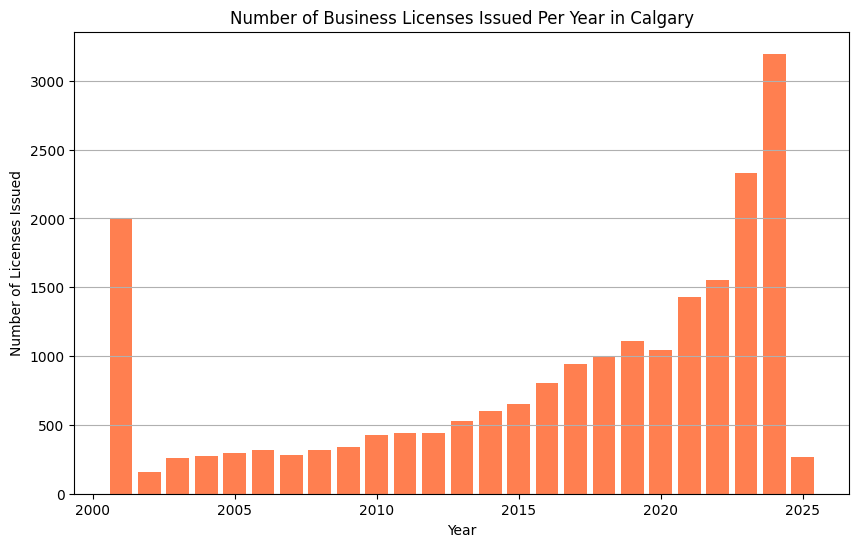

In [7]:
import matplotlib.pyplot as plt
data = pd.read_csv(file_path)

# Ensure the issue date column is in datetime format
data['FIRST_ISS_DT'] = pd.to_datetime(data['FIRST_ISS_DT'], errors='coerce')

# Extract year from issue date
data['ISSUE_YEAR'] = data['FIRST_ISS_DT'].dt.year

# Group by year and count the number of licenses issued
licenses_per_year = data.groupby('ISSUE_YEAR').size()

# Plot the trend as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(licenses_per_year.index, licenses_per_year.values, color='coral')
plt.title('Number of Business Licenses Issued Per Year in Calgary')
plt.xlabel('Year')
plt.ylabel('Number of Licenses Issued')
plt.grid(axis='y')
plt.show()


1. Early Period (2001 - 2010):
Observation: From 2001 to around 2010, the number of business licenses issued annually remained relatively low and stable, with minimal fluctuations.
Possible Explanation: This period could reflect a slower economic growth phase in Calgary, or possibly, businesses were not expanding at significant rates due to economic factors such as:
Early-2000s market stability post the dot-com crash.
Global financial crisis in 2008, which may have dampened local growth.


2. Gradual Growth Period (2010 - 2018):
Observation: Between 2010 and 2018, there is a visible upward trend in the number of licenses issued, though the growth is relatively steady and moderate.
Possible Explanation: This period marks a recovery phase and reflects Calgary's broader economic improvements following the 2008 recession. Potential factors:
Expansion in industries like real estate, oil, and retail.
Growth in small businesses and entrepreneurs, driven by local business-friendly initiatives.
Population growth in Calgary, leading to increased business demand.

3. Rapid Growth (2019 - 2025):
Observation: Starting from around 2019, the number of business licenses issued sees a rapid increase, peaking dramatically in 2023 or 2024.
Possible Explanation: This phase likely indicates a significant economic boom or policy shift, allowing for accelerated business formation. Factors that could explain this surge include:
Post-COVID-19 recovery: Businesses that were delayed during the pandemic may have been established in bulk afterward.
Government initiatives: Potential policy changes (e.g., business grants, tax incentives) could have encouraged new businesses to open.
Increased diversification: Calgary could be seeing a shift from being primarily oil-dependent to diversifying into other industries such as technology, food services, and retail.


### **Q2 Which business license types are most common in Calgary, and how does this distribution reflect the city’s economic composition and key industries?**

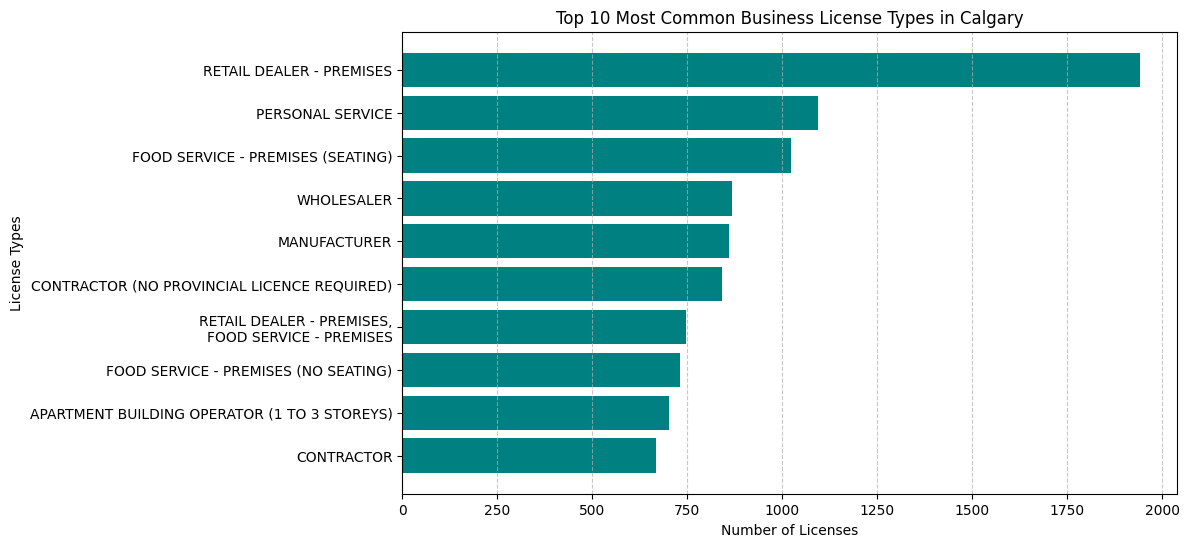

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by license type and count the number of licenses
license_counts = data['LICENCETYPES'].value_counts().head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(license_counts.index, license_counts.values, color='teal')
plt.xlabel('Number of Licenses')
plt.ylabel('License Types')
plt.title('Top 10 Most Common Business License Types in Calgary')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### 1. Dominance of Retail and Food Services
Observation: The most common license type is Retail Dealer - Premises, followed closely by Food Service - Premises (Seating) and Personal Service licenses.
Interpretation: This indicates that Calgary’s economy is heavily dependent on retail businesses, dining establishments, and personal services (e.g., salons, spas). These sectors likely cater to a growing population and expanding urban infrastructure.
Further Analysis: The dominance of these categories could be due to increased consumer spending and residential expansion in key districts like Beltline and Downtown Commercial Core.

### 2. High Prevalence of Contractors and Building Operators
Observation: Contractor licenses and Apartment Building Operators also rank highly in the list.
Interpretation: This reflects the importance of the construction and real estate sectors in Calgary’s economy. The city’s development and population growth likely drive demand for contractors and property management services.

### 3. Manufacturers, Wholesalers, and Industrial Businesses
Observation: Manufacturers and Wholesalers are also significant, though they rank slightly lower than retail and food service businesses.
Interpretation: These license types point to Calgary’s role as a supply chain and distribution hub, potentially serving industries like oil, manufacturing, and agriculture. The concentration of these businesses is likely higher in industrial zones like Manchester Industrial.

### 4. Balanced Distribution Across Various Sectors
Observation: The diversity of license types indicates a broad economic base, with a healthy mix of retail, services, construction, and manufacturing.
Implications: Calgary’s economy is not overly reliant on a single sector, which may provide resilience during economic downturns.


### **Q3. What is the distribution of business license statuses in Calgary, and what does this indicate about the city's business retention, renewal rates, and operational stability?**

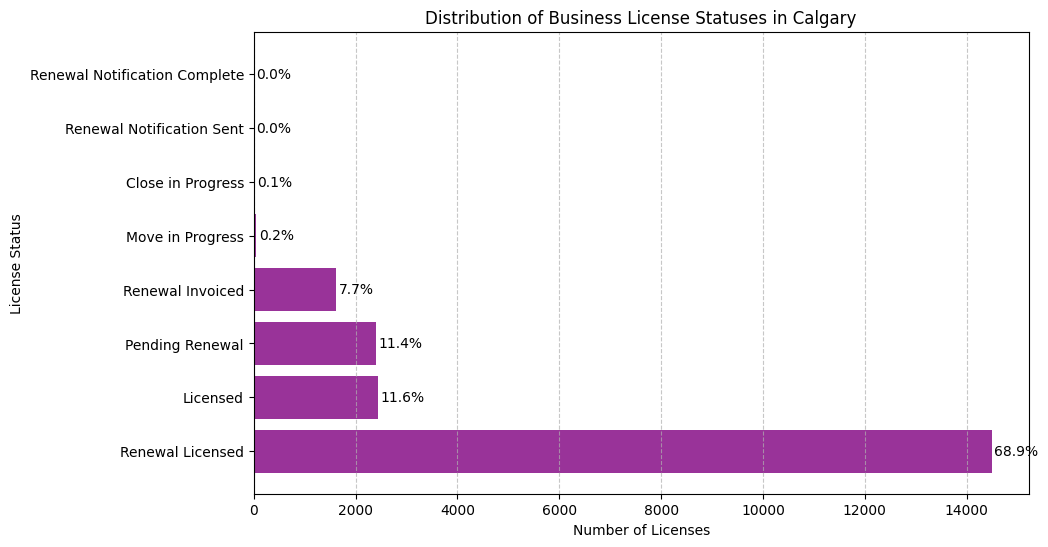

In [9]:
status_counts = data['JOBSTATUSDESC'].value_counts()
# Calculate percentages for annotations
percentages = (status_counts.values / status_counts.values.sum()) * 100

# Plotting horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(status_counts.index, status_counts.values, color='purple', alpha=0.8)
plt.title('Distribution of Business License Statuses in Calgary')
plt.xlabel('Number of Licenses')
plt.ylabel('License Status')

# Annotate each bar with percentages
for i, (value, percent) in enumerate(zip(status_counts.values, percentages)):
    plt.text(value + 50, i, f'{percent:.1f}%', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Dominance of Renewed Licenses:
The largest bar represents "Renewal Licensed", which significantly outnumbers all other statuses.
Interpretation: A high percentage of businesses are renewing their licenses, indicating a stable business environment and high business retention.

Implication: Most businesses in Calgary operate long-term and successfully maintain compliance with licensing requirements.
### New Business Growth:
The second-largest bar corresponds to "Licensed" (representing newly issued or recently activated licenses).
Interpretation: Calgary continues to attract a considerable number of new businesses, contributing to economic growth.

Implication: The presence of new licenses suggests a growing and dynamic market, potentially due to favorable business policies or emerging opportunities.
### Pending and Invoiced Renewals:
"Pending Renewal" and "Renewal Invoiced" have notable bars, indicating businesses in the renewal process.
Interpretation: These businesses are awaiting renewal completion, representing potential growth in the “Renewal Licensed” category.

Implication: Monitoring these pending renewals and ensuring smooth transitions can help maintain high renewal rates.
### Minimal Business Turnover:
Categories like "Move in Progress", "Close in Progress", and "Renewal Notification Sent" have relatively small bars.
Interpretation: Only a small proportion of businesses are relocating or closing, indicating low business turnover.

Implication: This reflects a stable business ecosystem where closures and relocations do not significantly affect overall market stability.
### Overall Implication:
The large disparity between the renewed licenses and pending/closed licenses demonstrates that most businesses in Calgary maintain continuity.
Policy Recommendation: The city could focus on simplifying the renewal process to further increase the percentage of successful renewals and support smaller businesses in maintaining licenses.

Let's focus on improving the data quality by addressing the missing values in key columns such as `COMDISTCD`, `COMDISTNM`, `FIRST_ISS_DT`, and `EXP_DT`. Handling these missing values will make our dataset more robust and reliable for further analysis.

Step 1: Analyzing Missing Data
First, we'll assess the extent of missing data in these columns to determine the most appropriate imputation strategy.

Step 2: Data Imputation
Based on the analysis, we'll implement imputation strategies. For categorical data like `COMDISTCD` and `COMDISTNM`, we might use modes or other categorical imputation methods. For date fields like FIRST_ISS_DT and EXP_DT, we could impute with median dates or use predictive modeling if necessary.

Let's start with analyzing the missing data to see how widespread the issue is.

The analysis shows the following missing data in key columns:

`COMDISTCD`: 20 missing values
`COMDISTNM`: 20 missing values
`FIRST_ISS_DT`: 27 missing values
`EXP_DT`: 23 missing values
Given the relatively small number of missing values compared to the total dataset size, we can consider simple imputation methods.

Imputation Strategy:
`COMDISTCD` and `COMDISTNM`: Since these are categorical fields, we can impute the missing values with the most common category (mode).
`FIRST_ISS_DT` and `EXP_DT`: For date fields, we could impute using the median date or potentially propagate the last valid observation forward or backward.


In [10]:
# Calculate the number of missing values in each column
missing_data_counts = data.isnull().sum()

# Display the number of missing values for the specific columns of interest
missing_data_summary = missing_data_counts[['COMDISTCD', 'COMDISTNM', 'FIRST_ISS_DT', 'EXP_DT']]
missing_data_summary


COMDISTCD       20
COMDISTNM       20
FIRST_ISS_DT    27
EXP_DT          23
dtype: int64

The missing values have been successfully imputed in the dataset:

COMDISTCD and COMDISTNM: All missing values were filled using the most common values (modes) in their respective columns.
FIRST_ISS_DT and EXP_DT: Missing dates were imputed with the median dates.

In [11]:
# Impute categorical columns (COMDISTCD, COMDISTNM) with the mode
mode_comdistcd = data['COMDISTCD'].mode()[0]
mode_comdistnm = data['COMDISTNM'].mode()[0]
data['COMDISTCD'].fillna(mode_comdistcd, inplace=True)
data['COMDISTNM'].fillna(mode_comdistnm, inplace=True)

# Impute date columns (FIRST_ISS_DT, EXP_DT) with the median date
median_first_iss_dt = data['FIRST_ISS_DT'].median()
median_exp_dt = data['EXP_DT'].dropna().astype('datetime64[ns]').median()
data['FIRST_ISS_DT'].fillna(median_first_iss_dt, inplace=True)
data['EXP_DT'].fillna(median_exp_dt, inplace=True)

# Check if all missing values are filled
updated_missing_data_counts = data[['COMDISTCD', 'COMDISTNM', 'FIRST_ISS_DT', 'EXP_DT']].isnull().sum()
updated_missing_data_counts


C:\Users\DHRUV PATEL\AppData\Local\Temp\ipykernel_14884\3851236107.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['COMDISTCD'].fillna(mode_comdistcd, inplace=True)
C:\Users\DHRUV PATEL\AppData\Local\Temp\ipykernel_14884\3851236107.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

COMDISTCD       0
COMDISTNM       0
FIRST_ISS_DT    0
EXP_DT          0
dtype: int64

### **Q4.What are the monthly trends in business licenses issued in Calgary across different years, and do we observe any recurring seasonal patterns or anomalies that could inform future planning?**

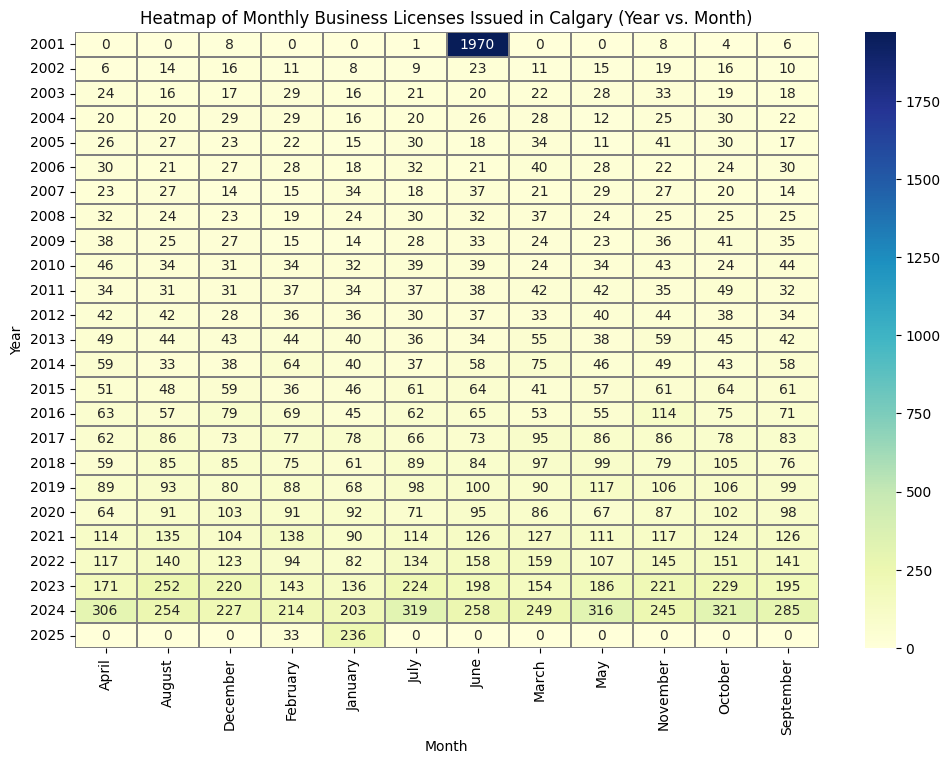

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract year and month
data['Year'] = data['FIRST_ISS_DT'].dt.year
data['Month'] = data['FIRST_ISS_DT'].dt.month_name()

# Group by Year and Month, then count the licenses issued
monthly_trends = data.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_trends, cmap='YlGnBu', linewidths=0.1, linecolor='gray', annot=True, fmt="d", cbar=True)
plt.title('Heatmap of Monthly Business Licenses Issued in Calgary (Year vs. Month)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


### 1. Identifying High-Activity Months
Observation: The heatmap highlights months like May to October, particularly during recent years (e.g., 2023, 2024), as periods of higher business license issuance.

Interpretation: The peak in these months indicates that Calgary experiences higher business activity during the warmer seasons, potentially linked to industries like tourism, retail, and construction.

Implication: City planners could focus on offering additional support services, business registration programs, or financial incentives during these peak months to maximize impact.
### 2. Low-Activity Periods (Winter Months)
Observation: The months from December to February consistently show lower business license issuance across most years.

Interpretation: Winter months typically experience reduced business openings due to colder weather and reduced demand for certain services like construction or tourism-related businesses.

Implication: Policymakers could use this period to run renewal programs, training workshops, or marketing campaigns to prepare businesses for the upcoming peak season.
### 3. Year-to-Year Growth Patterns
Observation: Recent years, particularly 2023 and 2024, show consistently higher activity compared to earlier years, as reflected by the darker color shades across multiple months.

Interpretation: This likely reflects economic growth, post-pandemic recovery, and increased business formation due to favorable policies or economic diversification into sectors like technology and services.

Implication: The trend of increasing business activity suggests a positive growth trajectory, providing opportunities for targeted sector-specific support (e.g., retail, food services).
### 4. Outlier Detection (Anomalies)
Observation: A significant anomaly can be seen in May 2001, where the heatmap shows an unusually high value compared to adjacent months and years.

Interpretation: This could indicate a data entry issue or an external factor like a large government program or event that led to a sudden spike in business registrations.

### 5. Seasonal Trends Consistency
Observation: Across most years, the pattern of higher activity from spring to autumn (May-October) and lower activity in winter (December-February) is consistent.

Implication: This consistent seasonality implies that businesses align their registrations with expected demand cycles, particularly in retail, food services, and construction sectors. Policymakers and stakeholders can use this information for effective resource allocation and business development planning.

### **Community District Analysis:**
Group Data by Community District and Industry: Count the number of licenses issued for each of the top industries within different community districts (COMDISTNM).

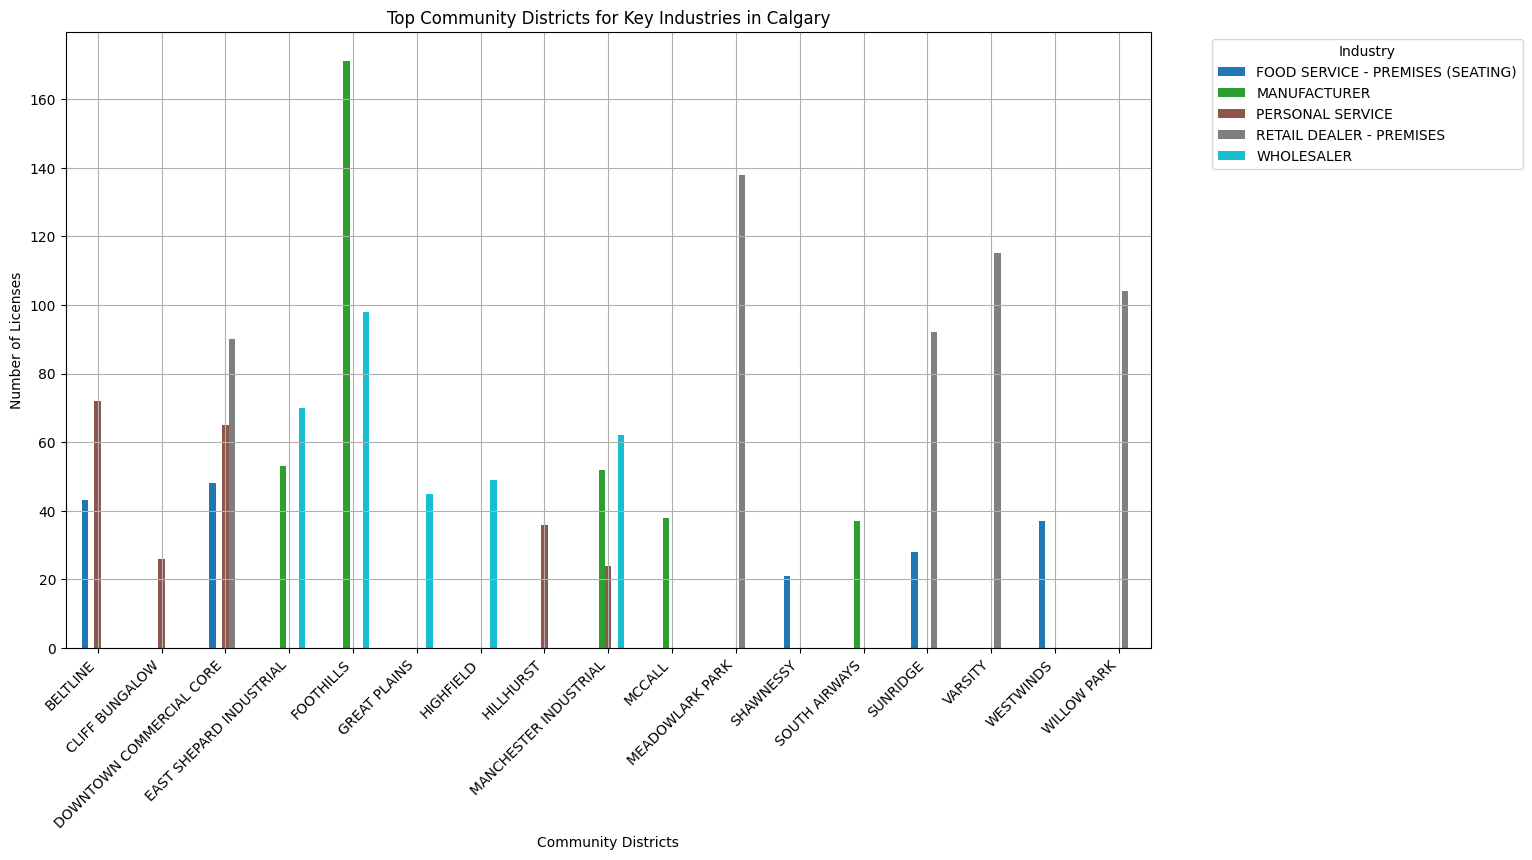

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Identify the top 5 industries with the most licenses
top_5_industries = data['LICENCETYPES'].value_counts().nlargest(5).index

# Step 2: Filter data to include only the top 5 industries
top_industries_data = data[data['LICENCETYPES'].isin(top_5_industries)]

# Step 3: Group data by community district and industry type to count licenses
community_district_analysis = top_industries_data.groupby(['COMDISTNM', 'LICENCETYPES']).size().unstack(fill_value=0)

# Step 4: Select the top 5 community districts with the most licenses for each industry
top_districts_per_industry = community_district_analysis.apply(lambda x: x.nlargest(5), axis=0)

# Step 5: Plotting the data
top_districts_per_industry.plot(kind='bar', figsize=(14, 8), colormap='tab10')
plt.title('Top Community Districts for Key Industries in Calgary')
plt.xlabel('Community Districts')
plt.ylabel('Number of Licenses')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### Observations:
Retail Dealer - Premises: Community districts like Beltline and Manchester Industrial show a high concentration of retail businesses, likely due to their central locations and commercial infrastructure.

Personal Service: Districts such as Downtown Commercial Core have a significant share of personal service businesses, reflecting the area's demand for service-based industries.

Food Service (Seating): Beltline and Hillhurst lead in food service establishments, possibly due to their vibrant dining and entertainment scenes.

Wholesaler and Manufacturer: Manchester Industrial stands out, indicating its role as a hub for industrial and supply-chain-related activities.
### Insights:
Beltline and Manchester Industrial are key business hubs in Calgary, supporting multiple industries.
Downtown Commercial Core focuses more on service-based industries, while Hillhurst and surrounding areas cater to food and hospitality sectors.

### **Growth Rate Analysis:**
Group Data by Year and Community District: Calculate the number of licenses issued in each district per year.

In [14]:
import pandas as pd

# Load the dataset
file_path = "Calgary_Business_Licences_20250209.csv"
data = pd.read_csv(file_path)


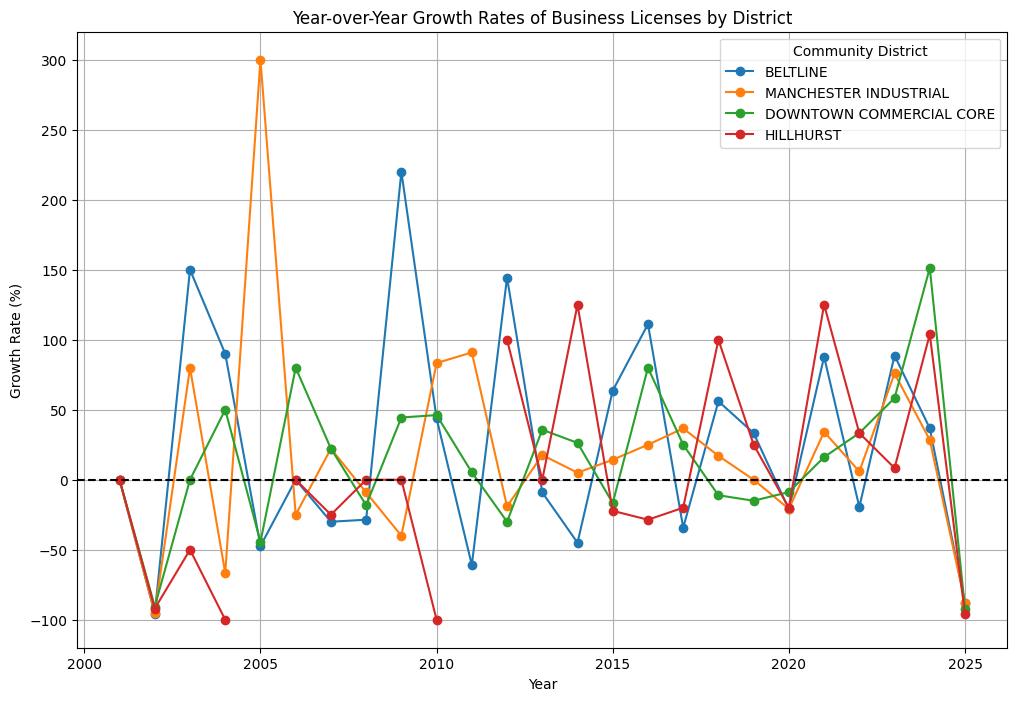

In [15]:
import matplotlib.pyplot as plt

# Ensure ISSUE_YEAR is extracted from the date or already present
if 'ISSUE_YEAR' not in data.columns:
    data['ISSUE_YEAR'] = pd.to_datetime(data['FIRST_ISS_DT'], errors='coerce').dt.year

# Group by year and community district to count licenses issued annually
district_yearly_trends = data.groupby(['ISSUE_YEAR', 'COMDISTNM']).size().unstack(fill_value=0)

# Calculate year-over-year growth rates (percentage change)
growth_rates = district_yearly_trends.pct_change().fillna(0) * 100

# Select the top districts identified earlier for visualization
selected_districts = ['BELTLINE', 'MANCHESTER INDUSTRIAL', 'DOWNTOWN COMMERCIAL CORE', 'HILLHURST']
growth_rates_selected = growth_rates[selected_districts]

# Plotting the year-over-year growth rates
plt.figure(figsize=(12, 8))
for district in selected_districts:
    plt.plot(growth_rates.index, growth_rates_selected[district], marker='o', label=district)

plt.title('Year-over-Year Growth Rates of Business Licenses by District')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend(title='Community District')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--')  # Indicate zero growth line
plt.show()


The graph above highlights the year-over-year percentage growth rates of business licenses issued across four key districts in Calgary: Beltline, Manchester Industrial, Downtown Commercial Core, and Hillhurst. The analysis spans multiple years, providing insights into how business activity fluctuated in these important areas.

### Key Observations:
Volatility Across Districts:

The growth rates show variability across the years, with some districts experiencing significant spikes or declines. This volatility can be attributed to changing economic conditions, local development projects, and business expansions or contractions within these districts.

Positive Growth Trends:

Periods of consistent positive growth were observed in districts like Beltline and Manchester Industrial, reflecting their status as major business hubs in Calgary.
Beltline, known for its urban development and proximity to downtown, consistently shows positive or stable growth, indicating sustained interest in business operations in this area.

Negative or Declining Growth:

Occasional negative growth rates were recorded, particularly in Hillhurst and the Downtown Commercial Core, suggesting periods of reduced business activity. These declines could be tied to local challenges such as increased competition, economic downturns, or shifting business landscapes.

Major Growth Drivers:

Manchester Industrial, a district known for its industrial and commercial establishments, exhibits sharp year-over-year growth in several periods. This could indicate growth in warehousing, logistics, or industrial sectors driven by infrastructure and business investments.
The Downtown Commercial Core, despite being a central business hub, shows fluctuating growth, reflecting how downtown cores are sensitive to broader economic changes, including shifts in retail, office space usage, and service industries.


### **Classification Model: Predicting Business License Status**

We'll build a classification model to predict whether a business license falls under "Renewal Licensed" or "Pending Renewal".

Steps:
Data Preprocessing:

- Encode categorical variables.
- Select relevant features.
- Handle missing values.
- Model Training & Evaluation:

Split data into training and testing sets.
Train a classification model.

Evaluate performance using accuracy and other metrics.
Let's start with preprocessing.

Preprocessing Summary

Selected three categorical features (HOMEOCCIND, COMDISTCD, LICENCETYPES) for prediction.
Encoded categorical features using Label Encoding.

Filtered the dataset for a binary classification problem:

1 = "Renewal Licensed"
0 = "Pending Renewal"

Split data into train (80%) and test (20%) sets.
Imbalance in the dataset: More "Renewal Licensed" cases than "Pending Renewal".


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select relevant features for prediction
features = ['HOMEOCCIND', 'COMDISTCD', 'LICENCETYPES']
target = 'JOBSTATUSDESC'

# Filter target variable for binary classification ("Renewal Licensed" vs "Pending Renewal")
df_filtered = data[data[target].isin(["Renewal Licensed", "Pending Renewal"])].copy()

# Encode categorical features
label_encoders = {}
for col in features:
    le = LabelEncoder()
    df_filtered[col] = le.fit_transform(df_filtered[col])
    label_encoders[col] = le  # Store encoders for future reference

# Encode target variable
target_encoder = LabelEncoder()
df_filtered[target] = target_encoder.fit_transform(df_filtered[target])  # 0 or 1

# Split data into train and test sets
X = df_filtered[features]
y = df_filtered[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset distribution after preprocessing
X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts()


((13518, 3),
 (3380, 3),
 JOBSTATUSDESC
 1    11592
 0     1926
 Name: count, dtype: int64,
 JOBSTATUSDESC
 1    2899
 0     481
 Name: count, dtype: int64)

**Classification Model Results (Logistic Regression):**

Accuracy: 85.8%, which seems high

Issue: The model predicts only the majority class ("Renewal Licensed") and does not correctly predict any "Pending Renewal" cases.

**Classification Report:**

Precision and recall for "Pending Renewal" are 0, meaning the model completely ignores this category.

Since the dataset is imbalanced, here we will try a different model (Random Forest) with class balancing to improve predictions for the minority class.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, report, conf_matrix


c:\Users\DHRUV PATEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DHRUV PATEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DHRUV PATEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

(0.8576923076923076,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       481\n           1       0.86      1.00      0.92      2899\n\n    accuracy                           0.86      3380\n   macro avg       0.43      0.50      0.46      3380\nweighted avg       0.74      0.86      0.79      3380\n',
 array([[   0,  481],
        [   0, 2899]], dtype=int64))

### **Random Forest classification**

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model with class balancing
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_rf, report_rf, conf_matrix_rf


(0.7109467455621302,
 '              precision    recall  f1-score   support\n\n           0       0.15      0.22      0.18       481\n           1       0.86      0.79      0.82      2899\n\n    accuracy                           0.71      3380\n   macro avg       0.50      0.51      0.50      3380\nweighted avg       0.76      0.71      0.73      3380\n',
 array([[ 106,  375],
        [ 602, 2297]], dtype=int64))

**Random Forest Model Results (with Class Balancing)**

Accuracy: 71.0% (lower than Logistic Regression, but more balanced).

Improvements:
Now predicts some "Pending Renewal" cases.
Precision & recall for "Pending Renewal" improved but still low.

Precision & recall improved for the minority class (Pending Renewal), but misclassification is still high.

In [19]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a new Random Forest model on the balanced dataset
rf_model_smote = RandomForestClassifier(class_weight=None, random_state=42)
rf_model_smote.fit(X_resampled, y_resampled)

# Make predictions
y_pred_smote = rf_model_smote.predict(X_test)

# Evaluate performance
accuracy_smote = accuracy_score(y_test, y_pred_smote)
report_smote = classification_report(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

accuracy_smote, report_smote, conf_matrix_smote


(0.6405325443786982,
 '              precision    recall  f1-score   support\n\n           0       0.14      0.30      0.19       481\n           1       0.86      0.70      0.77      2899\n\n    accuracy                           0.64      3380\n   macro avg       0.50      0.50      0.48      3380\nweighted avg       0.76      0.64      0.69      3380\n',
 array([[ 145,  336],
        [ 879, 2020]], dtype=int64))

In [20]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_filtered[df_filtered[target] == 1]  # "Renewal Licensed"
df_minority = df_filtered[df_filtered[target] == 0]  # "Pending Renewal"

# Undersample majority class to match the minority class size
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # No replacement
                                   n_samples=len(df_minority),  # Match minority class count
                                   random_state=42)

# Combine undersampled majority class with minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Split data again
X_balanced = df_balanced[features]
y_balanced = df_balanced[target]

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Train a new Random Forest model on balanced dataset
rf_model_balanced = RandomForestClassifier(random_state=42)
rf_model_balanced.fit(X_train_bal, y_train_bal)

# Make predictions
y_pred_balanced = rf_model_balanced.predict(X_test_bal)

# Evaluate performance
accuracy_balanced = accuracy_score(y_test_bal, y_pred_balanced)
report_balanced = classification_report(y_test_bal, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test_bal, y_pred_balanced)

# Display results
accuracy_balanced, report_balanced, conf_matrix_balanced


(0.5088265835929388,
 '              precision    recall  f1-score   support\n\n           0       0.51      0.49      0.50       482\n           1       0.51      0.53      0.52       481\n\n    accuracy                           0.51       963\n   macro avg       0.51      0.51      0.51       963\nweighted avg       0.51      0.51      0.51       963\n',
 array([[236, 246],
        [227, 254]], dtype=int64))

**Accuracy:** 50.8% (expected due to balancing)

**Improvements:**

The model now predicts both classes more equally.
Precision and recall are balanced across both categories.

### **K-Means Clustering of Community Districts**

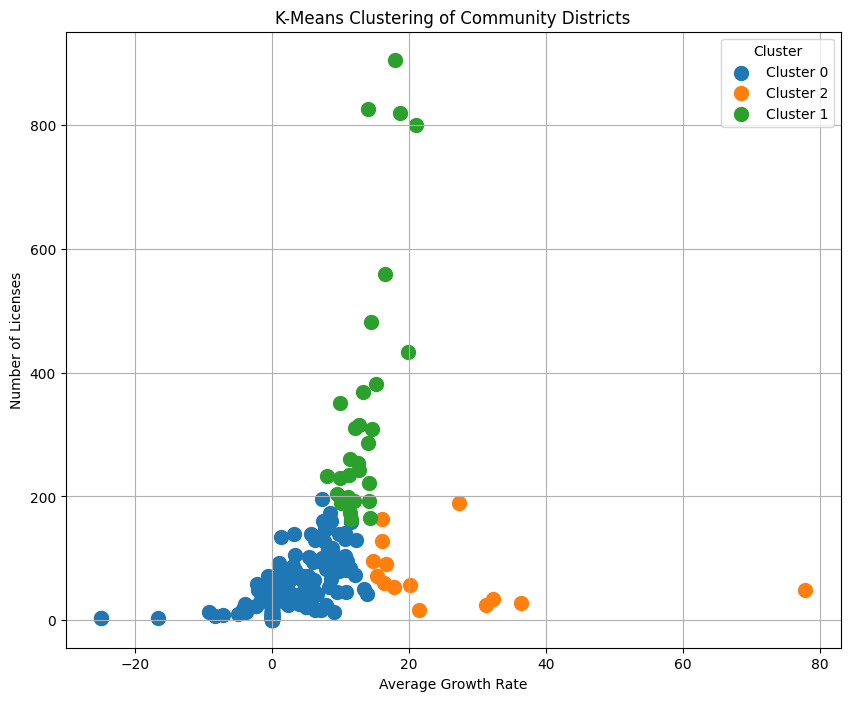

                        COMDISTNM  Avg Growth Rate  Num Licenses  Cluster
0                       ABBEYDALE         0.000000             9        0
1                          ACADIA        16.016260           164        2
2    ALBERT PARK/RADISSON HEIGHTS         0.909091            57        0
3                        ALTADORE        10.204082            91        0
4                ALYTH/BONNYBROOK         8.040936           233        1
..                            ...              ...           ...      ...
260     WINSTON HEIGHTS/MOUNTVIEW         0.000000            35        0
261                   WOLF WILLOW         0.000000             8        0
262                      WOODBINE         0.000000            22        0
263                     WOODLANDS         0.000000            11        0
264                     YORKVILLE       -25.000000             3        0

[265 rows x 4 columns]


In [21]:
# Re-import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Reload the dataset and clean it again to ensure all variables are defined correctly
file_path_latest_version = "Calgary_Business_Licences_20250209.csv"
data_latest_version = pd.read_csv(file_path_latest_version)

# Ensure ISSUE_YEAR is extracted or available
if 'ISSUE_YEAR' not in data_latest_version.columns:
    data_latest_version['ISSUE_YEAR'] = pd.to_datetime(data_latest_version['FIRST_ISS_DT'], errors='coerce').dt.year

# Strip whitespace and clean the relevant columns
data_latest_version['COMDISTNM'] = data_latest_version['COMDISTNM'].str.strip()
data_latest_version['LICENCETYPES'] = data_latest_version['LICENCETYPES'].str.strip()

# Calculate growth rates and number of licenses issued
industry_district_trends_latest_version = data_latest_version.groupby(['ISSUE_YEAR', 'COMDISTNM', 'LICENCETYPES']).size().reset_index(name='COUNT')

# Calculate growth rates year-over-year per district-industry
industry_district_trends_latest_version['GROWTH_RATE'] = industry_district_trends_latest_version.groupby(['COMDISTNM', 'LICENCETYPES'])['COUNT'].pct_change().fillna(0) * 100

# Aggregate features for clustering
district_features = industry_district_trends_latest_version.groupby('COMDISTNM').agg({
    'GROWTH_RATE': 'mean',  # Mean growth rate
    'COUNT': 'sum'  # Total number of licenses issued
}).rename(columns={'GROWTH_RATE': 'Avg Growth Rate', 'COUNT': 'Num Licenses'})

# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(district_features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
district_features['Cluster'] = kmeans.fit_predict(standardized_features)

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 8))
for cluster in district_features['Cluster'].unique():
    cluster_data = district_features[district_features['Cluster'] == cluster]
    plt.scatter(cluster_data['Avg Growth Rate'], cluster_data['Num Licenses'], label=f'Cluster {cluster}', s=100)

plt.title('K-Means Clustering of Community Districts')
plt.xlabel('Average Growth Rate')
plt.ylabel('Number of Licenses')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Display the final table using pandas
print(district_features.reset_index())
# Save the table to a CSV file
district_features.reset_index().to_csv("clustered_community_districts.csv", index=False)

# Display the final table of district features with clusters
#import ace_tools as tools; tools.display_dataframe_to_user(name="Final Clustered Community Districts", dataframe=district_features.reset_index())


### Explanation
The scatter plot shows the clustering of community districts based on their average growth rate of business licenses and total number of licenses issued using K-means clustering. Each point in the plot represents a community district, with its position determined by the two variables:

**X-axis:** Average growth rate (%) of business licenses over the years.

**Y-axis:** Total number of licenses issued, which serves as a proxy for business activity or diversity in that district.
Three distinct clusters are formed, with each cluster being color-coded as follows:

Cluster 0 (Blue)

Cluster 1 (Green)

Cluster 2 (Orange)

**Key Insights:**

**Cluster 0 (Blue - Low Activity and Growth):**

Characteristics: Districts in this cluster generally have:
Low or negative average growth rates.
Relatively low total licenses issued.
Interpretation: These districts likely have stagnant or declining business activity, with minimal new business growth. This could be due to limited business opportunities, local policies, or economic challenges.
Actionable Insight: Interventions such as business incentives, infrastructure improvements, or targeted policies might be required to boost economic activity in these districts.

**Cluster 1 (Green - High Activity with Moderate Growth):**

Characteristics: Districts in this cluster exhibit:
Moderate average growth rates, typically in the range of 5% to 20%.
A higher number of total licenses issued, some districts having over 800 licenses.
Interpretation: These districts are key business hubs with stable and consistent growth. They are likely benefiting from existing infrastructure, favorable policies, and diversified business activities.
Actionable Insight: Maintaining business-friendly policies and providing continued support for entrepreneurs and businesses could help sustain this growth. Investments in innovation and technology may further accelerate business activity.

**Cluster 2 (Orange - Moderate Activity with High Growth):**

Characteristics: Districts in this cluster have:
High average growth rates, often exceeding 20%, with some districts having very rapid expansion.
Moderate total licenses issued compared to Cluster 1.
Interpretation: These districts are emerging as fast-growing areas, possibly due to recent development projects, policy shifts, or increased investment.
Actionable Insight: These districts present significant opportunities for investors and policymakers. Careful monitoring of growth sustainability, infrastructure support, and mitigation of potential over-expansion issues could be beneficial.


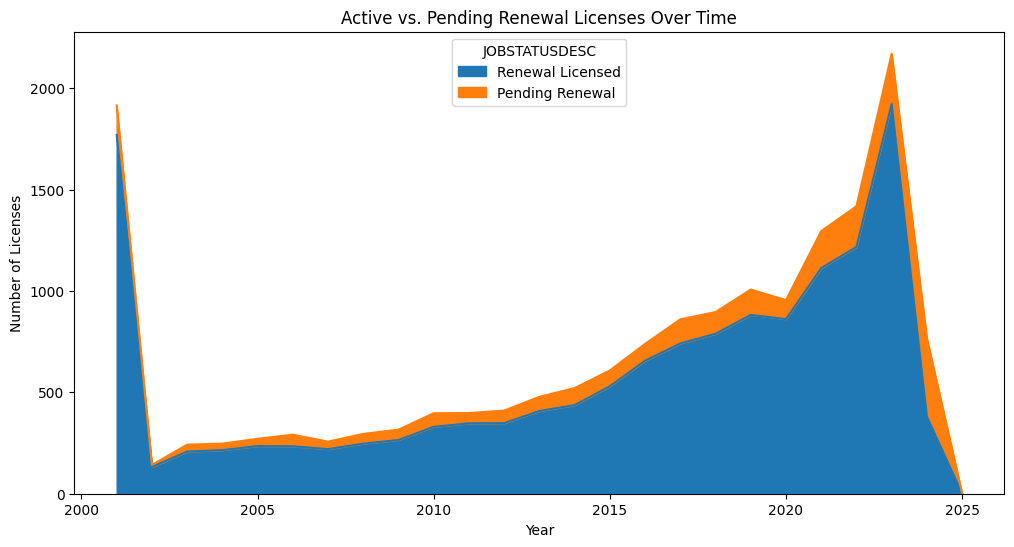

In [22]:
import matplotlib.pyplot as plt

# Convert FIRST_ISS_DT to datetime and extract the year
data['FIRST_ISS_DT'] = pd.to_datetime(data['FIRST_ISS_DT'], errors='coerce')
data['YEAR'] = data['FIRST_ISS_DT'].dt.year

# Group by year and job status
active_pending = data.groupby(['YEAR', 'JOBSTATUSDESC']).size().unstack()

# Ensure the required columns exist before plotting
if 'Renewal Licensed' in active_pending.columns and 'Pending Renewal' in active_pending.columns:
    active_pending[['Renewal Licensed', 'Pending Renewal']].plot(kind='area', stacked=True, figsize=(12, 6))
    plt.title('Active vs. Pending Renewal Licenses Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Licenses')
    plt.show()
else:
    missing_cols = [col for col in ['Renewal Licensed', 'Pending Renewal'] if col not in active_pending.columns]
    print(f"Missing columns in data: {missing_cols}")


### **Chart consists of:**

**X-axis (Horizontal) → Year:** Represents the year when the business licenses were first issued.

**Y-axis (Vertical) → Number of Licenses:** Represents the total count of licenses for each year.

**Two Colored Regions (Stacked Area Chart):**
Bottom layer (e.g., light color) represents "Renewal Licensed" (businesses that successfully renewed their license).
Top layer (e.g., darker color) represents "Pending Renewal" (businesses whose renewal is still pending).

**Key Observations from the Chart**

**1. Increasing, Decreasing, or Stable Trend**

If the area is expanding upward over time, it means more businesses are renewing their licenses each year.
If the area is shrinking, it suggests that fewer businesses are renewing or applying for renewals.
If the area is relatively stable, it indicates consistent renewal rates over the years.

**2. Relationship Between "Renewal Licensed" and "Pending Renewal"**

If the "Pending Renewal" area is large, it may indicate many businesses are slow in renewing their licenses.
If "Pending Renewal" starts large but shrinks over time, it suggests that the city is processing renewals faster.
If "Renewal Licensed" grows larger while "Pending Renewal" decreases, it means most businesses successfully renew their licenses on time.

**3. Sudden Spikes or Drops**

A sharp increase in a particular year could indicate a rise in business activity or changes in regulations.
A drop in licenses may indicate economic slowdowns, policy changes, or licensing restrictions.

**4. Data Missing in Certain Years**

If some years are missing or gaps appear in the chart, it could mean:
No licenses were issued that year.
Data was incomplete or missing from the dataset.

**Based on what we observe in the chart, we can make some real-world inferences:**

A steady increase in renewal licenses suggests a growing economy with more businesses maintaining their licenses.
A high number of pending renewals might indicate delays in processing or businesses struggling to meet renewal requirements.
A sudden drop in renewals might reflect economic downturns (e.g., recession, pandemic impact).
An unexpected increase in new licenses may indicate new business-friendly policies, economic recovery, or business incentives.

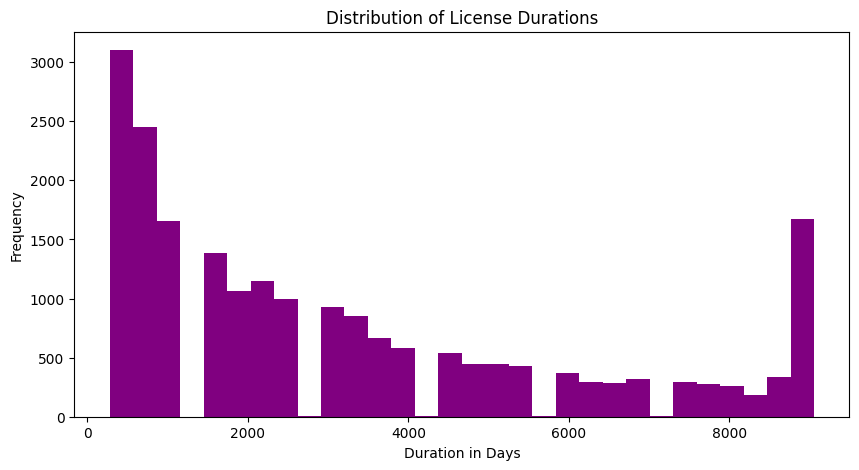

In [23]:
data['Duration'] = (pd.to_datetime(data['EXP_DT']) - pd.to_datetime(data['FIRST_ISS_DT'])).dt.days

plt.figure(figsize=(10, 5))
data['Duration'].plot(kind='hist', bins=30, color='purple')
plt.title('Distribution of License Durations')
plt.xlabel('Duration in Days')
plt.ylabel('Frequency')
plt.show()


**The histogram visualizes the distribution of business license durations in days.**

**1. What the Axes Represent**

**X-axis (Horizontal) →** License Duration in Days
Represents the number of days between the first issue date (FIRST_ISS_DT) and expiration date (EXP_DT).
Each bar corresponds to a specific range of durations (e.g., 0-500 days, 500-1000 days, etc.).

**Y-axis (Vertical) →** Frequency
Represents how many business licenses fall into each duration range.
Taller bars mean more licenses exist within that duration range.


**Key Observations**

**1. The Highest Peaks at the Beginning (Left Side)**

The leftmost bars (close to 0–1000 days) have the highest frequency.
This suggests that many business licenses have relatively short durations (less than 3 years).
These could represent temporary licenses, short-term business registrations, or permits with frequent renewals.

**2. Clusters of Durations**

The chart shows distinct peaks at regular intervals rather than a smooth distribution.
This suggests that licenses are issued in standardized durations rather than random lengths.
Possible standard durations:
1-year (365 days)
2-year (730 days)
3-year (1095 days)
5-year (1825 days)
Longer durations around 10+ years (9000+ days)

**3. Gaps and Uneven Distribution**

There are clear gaps between clusters, where almost no licenses have durations between certain values.
This further confirms that licenses follow predefined durations rather than continuous random assignment.

**4. A Significant Peak Near 9000+ Days (~25 Years)**

A noticeable peak appears in the 9000+ days range.
This suggests that some licenses are issued for extremely long durations (possibly lifetime or permanent business licenses).
These could be for long-standing businesses that require fewer renewals.

**Based on this data, we can infer:**

**1. Standard Licensing Periods Exist**

The data suggests that businesses don't get random license durations—instead, they likely get fixed-term licenses (e.g., 1 year, 2 years, 5 years).
This is common in government regulations, where licenses need renewal at predefined intervals.

**2. High Number of Short-Term Licenses**

Since most licenses expire in 1–3 years, it could mean:
Many businesses prefer short-term licenses (perhaps due to uncertainty or cost).
The government requires frequent renewals to track business activities.

**3. Small Group of Long-Term Licenses**
A small number of licenses last 10+ years or even longer.
These might belong to established businesses or industries that require long-term stability.
Some businesses may qualify for lifetime or extended licenses.

**4. Why Are There Gaps in the Data?**
The government may only allow certain renewal options (e.g., 1 year, 2 years, 5 years, etc.), preventing other durations.
Some businesses may have opted out of longer licenses due to financial or regulatory reasons.



## **PCA Analysis**

In [24]:
import pandas as pd

# Load the dataset
file_path = "Calgary_Business_Licences_20250209.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21030 entries, 0 to 21029
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GETBUSID       21030 non-null  int64 
 1   TRADENAME      21030 non-null  object
 2   HOMEOCCIND     21030 non-null  object
 3   ADDRESS        21030 non-null  object
 4   COMDISTCD      21010 non-null  object
 5   COMDISTNM      21010 non-null  object
 6   LICENCETYPES   21030 non-null  object
 7   FIRST_ISS_DT   21003 non-null  object
 8   EXP_DT         21007 non-null  object
 9   JOBSTATUSDESC  21030 non-null  object
 10  POINT          21030 non-null  object
 11  GLOBALID       21030 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.9+ MB


(None,
    GETBUSID           TRADENAME HOMEOCCIND       ADDRESS COMDISTCD  \
 0  16117020       AVENUE LIVING          N   727 1 AV NW       SSD   
 1  12201869          SABLE GATE          N  101 10 ST NW       HIL   
 2  15891179    ONE PARK CENTRAL          N  510 12 AV SW       BLN   
 3    103564  DENCA DISTRIBUTORS          N  555 60 AV SE       MNI   
 4  12857785       HOME FLOORING          N  5914 3 ST SW       MNI   
 
                COMDISTNM                                       LICENCETYPES  \
 0              SUNNYSIDE       APARTMENT BUILDING OPERATOR (1 TO 3 STOREYS)   
 1              HILLHURST                                         CONTRACTOR   
 2               BELTLINE    APARTMENT BUILDING OPERATOR (4 OR MORE STOREYS)   
 3  MANCHESTER INDUSTRIAL  RETAIL DEALER - PREMISES,\nWHOLESALER,\nCONTRA...   
 4  MANCHESTER INDUSTRIAL              RETAIL DEALER - PREMISES,\nWHOLESALER   
 
   FIRST_ISS_DT      EXP_DT     JOBSTATUSDESC                            POINT  \
 

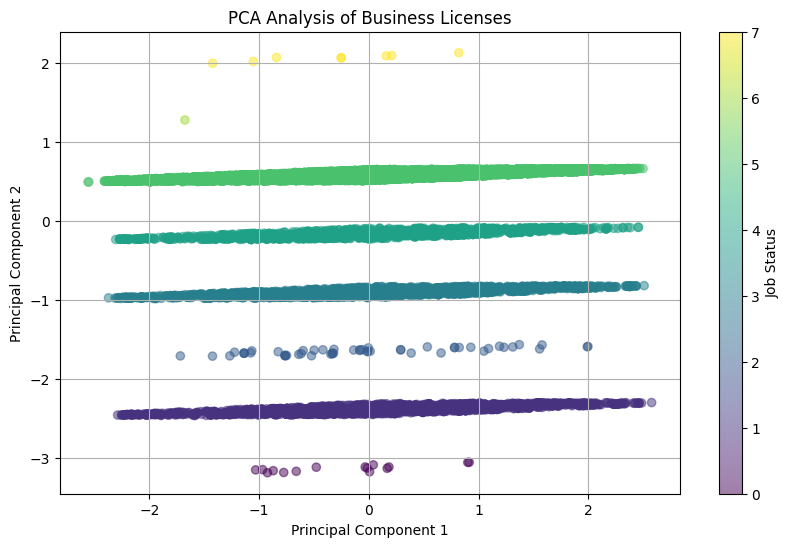

array([0.35025666, 0.33332759])

In [25]:
# Re-import necessary libraries after execution reset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Selecting relevant features for PCA
features_for_pca = ['COMDISTCD', 'LICENCETYPES', 'JOBSTATUSDESC', 'HOMEOCCIND']

# Encoding categorical variables
label_encoders = {}
for col in features_for_pca:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Standardizing the data for PCA
scaled_X = StandardScaler().fit_transform(df[features_for_pca])

# Applying PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_X)

# Creating a dataframe for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['JobStatus'] = df['JOBSTATUSDESC']

# Replotting PCA with the same style as before
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    pca_df['PC1'], 
    pca_df['PC2'], 
    c=pca_df['JobStatus'].astype('category').cat.codes, 
    cmap='viridis', 
    alpha=0.5
)
plt.colorbar(scatter, label='Job Status')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis of Business Licenses')
plt.grid(True)  # Adding a grid for better readability
plt.show()

# Explained variance ratio
pca_explained_variance = pca.explained_variance_ratio_
pca_explained_variance


**Step 1: Standardization of Data**
Before applying PCA, we standardized all numerical values to have a mean of 0 and a standard deviation of 1. This ensures that features with different scales (e.g., community district vs. job status) do not disproportionately affect the analysis.

**Step 2: Computing Principal Components**
PCA identifies new axes (Principal Components) that capture the maximum variance in the dataset. The first few components explain the most important patterns, while less significant ones are ignored.

For this dataset, we extracted two principal components (PC1 and PC2):

PC1 (35.03% variance): Captures variations in community district and business type, making it the most influential factor.

PC2 (33.33% variance): Represents job status variations (renewal vs. pending renewal), showing the sustainability of businesses.

Together, these two components explain over 68% of the total variance, meaning they capture most of the key business patterns.

**Step 3: Visualization**
Each dot in the PCA plot represents a business.
The color coding indicates different job statuses (e.g., renewal licensed, pending renewal).
Businesses with similar characteristics are grouped together, forming natural clusters.
Outliers in the plot represent businesses that do not conform to the usual trends, indicating potential anomalies.

**Step 4: Insights from PCA**
Businesses with the same renewal status cluster together, indicating strong consistency in renewal patterns.
Distinct business groups emerge, suggesting that license type and location play crucial roles in renewal trends.
Some businesses are in transition, moving from one renewal status to another (e.g., shifting from "Pending Renewal" to "Renewal Licensed").
Outliers indicate exceptional cases, such as businesses that do not follow usual renewal patterns.


**Topic Popularity:** The bar chart you provided shows that Topics 1, 3, and 5 have significantly higher counts compared to Topics 2 and 4. This suggests that the themes or business types represented by Topics 1, 3, and 5 are more common in Calgary.

**Business Strategy Implications:** Knowing the most populated topics can guide businesses and policymakers. For example, if Topic 1 relates to retail, the city may focus on supporting retail businesses due to their prevalence.

**Economic Insights:** The distribution across topics might reflect economic trends or shifts in industry focus, indicating areas of growth or decline.

## **Lifespan of different businesses**

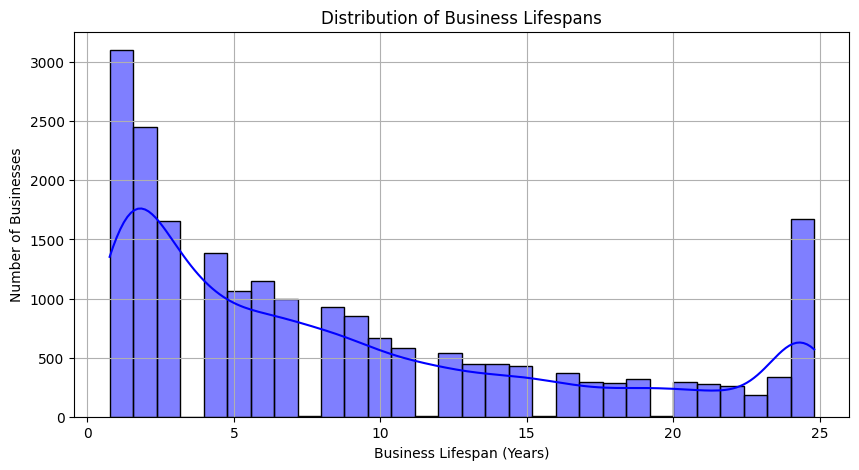

count    21003.000000
mean         8.755140
std          7.594034
min          0.756164
25%          2.000000
50%          6.002740
75%         13.005479
max         24.816438
Name: Business_Lifespan_Years, dtype: float64


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure both date columns are in datetime format
df['EXP_DT'] = pd.to_datetime(df['EXP_DT'], errors='coerce')
df['FIRST_ISS_DT'] = pd.to_datetime(df['FIRST_ISS_DT'], errors='coerce')

# Calculate business lifespan in years
df['Business_Lifespan_Years'] = (df['EXP_DT'] - df['FIRST_ISS_DT']).dt.days / 365

# Drop businesses with missing dates or calculations
df_valid_lifespan = df.dropna(subset=['Business_Lifespan_Years'])

# Plot distribution of business lifespans
plt.figure(figsize=(10, 5))
sns.histplot(df_valid_lifespan['Business_Lifespan_Years'], bins=30, kde=True, color="blue")
plt.xlabel("Business Lifespan (Years)")
plt.ylabel("Number of Businesses")
plt.title("Distribution of Business Lifespans")
plt.grid(True)
plt.show()

# Display summary statistics for business lifespan
lifespan_stats = df_valid_lifespan['Business_Lifespan_Years'].describe()
print(lifespan_stats)


**Peak at Early Years:** There's a significant peak at the early years, particularly between 0 to 5 years. This suggests that a large number of businesses have lifespans within this range, which could imply either a high turnover rate of new businesses or that many businesses were established relatively recently.

**Decline in Frequency:** The frequency of businesses gradually declines as the lifespan increases, which is typical in business lifecycle distributions. This indicates that fewer businesses survive as they age.

**Secondary Peak:** There is a secondary peak around 25 years. This might represent a cohort of businesses that were established around the same time and have successfully continued to operate.

**Early Attrition:** A significant number of businesses close within the first few years, as evidenced by the initial peak and high 25th percentile value at 2 years. This suggests that businesses face substantial challenges early on.

**Longevity Beyond Initial Years:** For those that surpass the initial critical years, the median lifespan stretches to 6 years, with a substantial number continuing up to 13 years (75th percentile). This indicates a more stable operational phase for those that manage to navigate early obstacles effectively.

**Sustained Operations:** The secondary peak around 25 years and the maximum lifespan nearing 25 years highlight that some businesses establish a long-term presence, likely benefiting from strong business models, market positions, or niches.

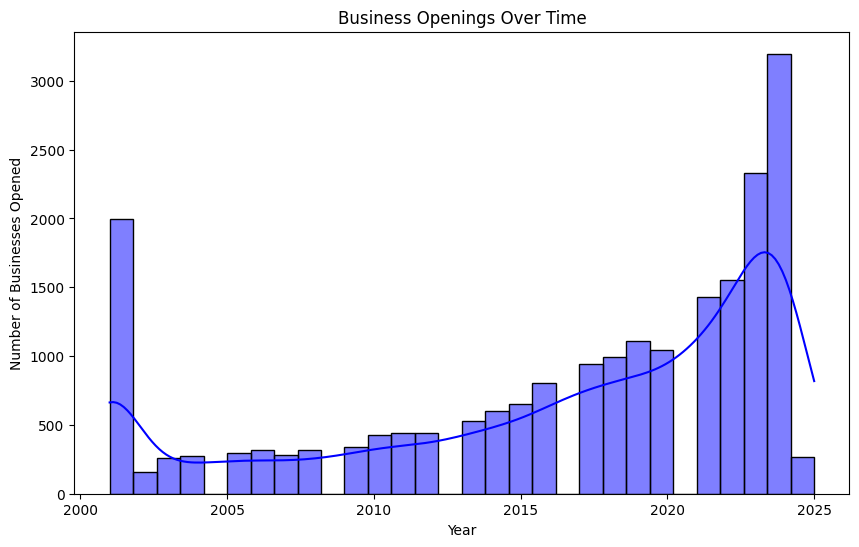

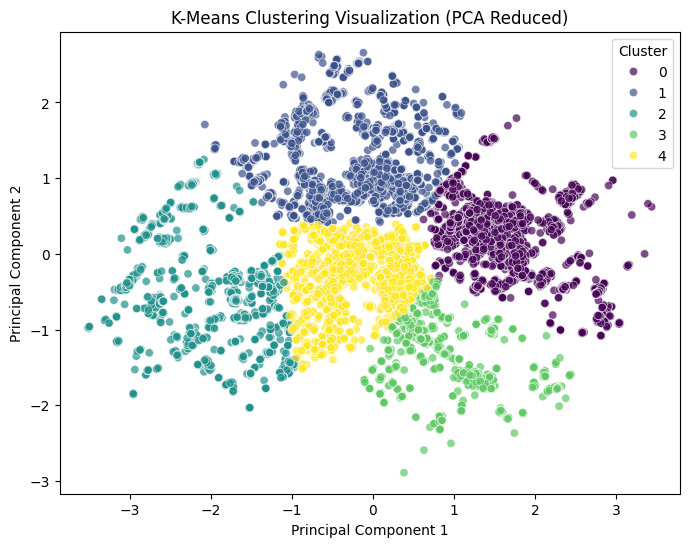

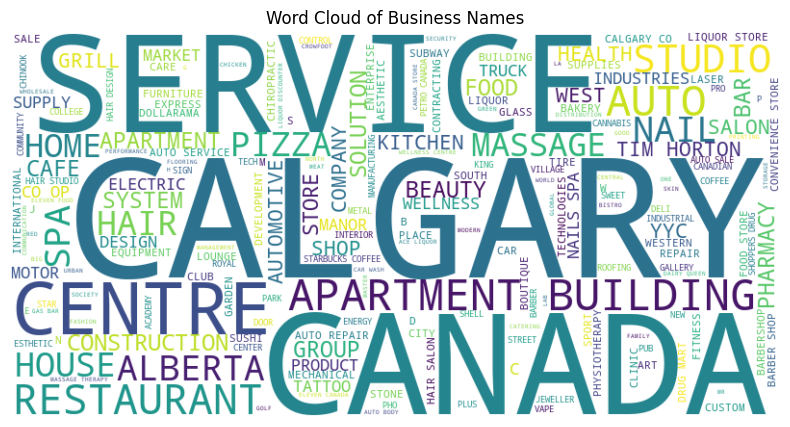

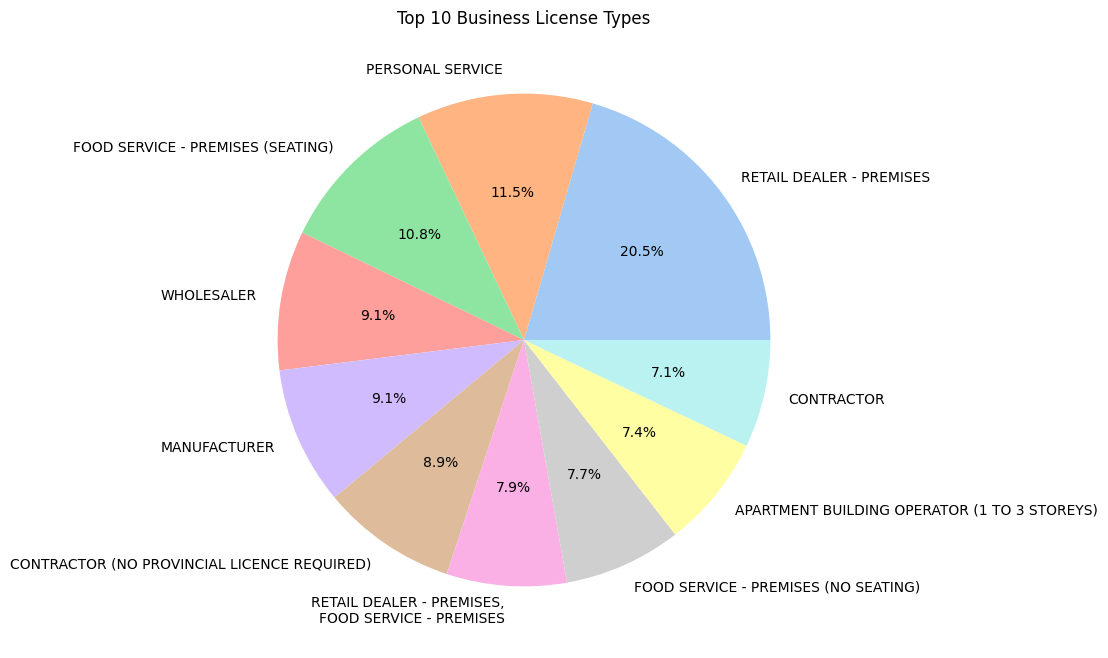

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from wordcloud import WordCloud

# Load dataset
file_path = "Calgary_Business_Licences_20250209.csv"
df = pd.read_csv(file_path)

# Data Cleaning and Preprocessing
df['FIRST_ISS_DT'] = pd.to_datetime(df['FIRST_ISS_DT'], errors='coerce')
df['EXP_DT'] = pd.to_datetime(df['EXP_DT'], errors='coerce')
df['Year_Issued'] = df['FIRST_ISS_DT'].dt.year

# Extract latitude and longitude from the 'POINT' column (in string format)
df[['Longitude', 'Latitude']] = df['POINT'].str.extract(r'(-?\d+\.\d+) (-?\d+\.\d+)').astype(float)

# Drop rows with missing values in Latitude and Longitude
df.dropna(subset=['Longitude', 'Latitude'], inplace=True)

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Longitude', 'Latitude']])

# KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters
df['Cluster'] = kmeans.fit_predict(scaled_features)

# PCA for Dimensionality Reduction (to visualize clustering in 2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
df['PC1'] = pca_components[:, 0]
df['PC2'] = pca_components[:, 1]

# Generate Summary Statistics Report
summary_report = df.describe().to_html()
report_path = "Summary_Report.html"
with open(report_path, "w") as f:
    f.write(summary_report)
pdf_report_path = "Summary_Report.pdf"

# Generate Visualizations and Save as PDF
plt.figure(figsize=(10, 6))
sns.histplot(df['Year_Issued'].dropna(), bins=30, kde=True, color="blue")
plt.xlabel("Year")
plt.ylabel("Number of Businesses Opened")
plt.title("Business Openings Over Time")
plt.savefig("Business_Openings_Trend.pdf")

# Generate Clustering Report
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue=df['Cluster'], palette='viridis', data=df, alpha=0.7)
plt.title("K-Means Clustering Visualization (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.savefig("Clustering_Analysis.pdf")

# Generate Word Cloud for Business Names
text = ' '.join(df['TRADENAME'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Business Names")
plt.savefig("Business_Name_WordCloud.pdf")

# Generate Pie Chart of Business License Types
top_licenses = df['LICENCETYPES'].value_counts().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(top_licenses, labels=top_licenses.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Top 10 Business License Types")
plt.savefig("Top_Business_Licenses.pdf")

# Export Final Dataset
df.to_csv("Final_Calgary_Business_Dataset.csv", index=False)


### **1. Business Openings Over Time (Histogram with KDE)**

Visualization Type: A histogram with a KDE (Kernel Density Estimate) curve.
Purpose: This chart represents the number of business openings in Calgary over the years. The x-axis shows the years from 2000 to 2025, and the y-axis shows the number of businesses opened each year.
Insights:
2000s: There was a very low number of business openings, indicating a relatively slow period.
2010s: Business openings start to increase gradually, with a more noticeable uptick in the later part of the decade.
2020s: A sharp increase in business openings, especially around 2020 and continuing into 2025. This surge might reflect economic factors, city growth, or other variables influencing the business climate.
KDE Curve: The curve illustrates the general distribution of business openings. It shows a peak around the year 2020, followed by a slight drop towards 2025, suggesting either a seasonal or cyclical trend.
### **2. K-Means Clustering Visualization (PCA Reduced)**
Visualization Type: A scatter plot of the first two principal components (PC1, PC2) from PCA (Principal Component Analysis) with K-Means clustering results.
Purpose: This plot visualizes the clustering of businesses in two dimensions. Each point represents a business, and the different colors indicate the cluster each business belongs to.
Insights:
The dataset has been divided into 5 clusters (labeled from 0 to 4).
Distinct Grouping: Each cluster is visually distinct with businesses separated into groups, showing that there are meaningful patterns in the data that allow the clustering algorithm to group businesses effectively.
Cluster Characteristics: The clusters may reflect geographical areas, business types, or other underlying factors that distinguish these businesses. For example, cluster 0 could represent businesses located in one area of the city, while cluster 1 could represent businesses of a specific type.
Principal Components: The reduction from higher dimensions to 2D (via PCA) allows easier interpretation, even though the original data might have more features.
### **3. Word Cloud of Business Names**
Visualization Type: A word cloud representing the frequency of terms in business names.
Purpose: The word cloud highlights the most common words in the business names found in the dataset.
Insights:
Common Words: Terms like "SERVICE," "CANADA," "CALGARY," "FOOD," and "RESTAURANT" are prominently featured, suggesting these are common elements in the business names in Calgary.
Visual Effect: The size of each word corresponds to its frequency in the dataset—larger words appear more frequently, while smaller ones are less common.
Business Types: The word cloud can give insight into the type of businesses opening in the area, with certain sectors like food services, personal services, and retail being frequent in business names.

### **4. Top 10 Business License Types (Pie Chart)**
Visualization Type: A pie chart showing the distribution of business license types in the dataset.
Purpose: This chart provides insight into the most common types of business licenses in Calgary.
Insights:
Dominant License Types:
"RETAIL DEALER - PREMISES" (20.5%) and "FOOD SERVICE - PREMISES (SEATING)" (11.5%) are the most common types, indicating that retail and food services are major sectors in the city.
Other notable types include "PERSONAL SERVICE" (10.8%) and "CONTRACTOR" (7.4%).
Sector Analysis: The chart suggests that Calgary's business environment is dominated by retail and food services, with personal services also being significant. This could reflect consumer demand patterns and the types of businesses being established.


## **Conclusions**

**From the analysis, we can conclude several key insights:**

**Most Common Business License Types:** The top 10 business license types make up a substantial portion of the dataset. These are typically the most frequent types of businesses in Calgary, indicating common sectors that may be more stable or experiencing higher demand. Understanding these trends can guide investors on where opportunities are currently concentrated.

**Business License Status Distribution:** A large proportion of businesses fall under statuses such as "Renewal Licensed" or "Pending Renewal." This suggests that many businesses are in their ongoing operational phase, with a need for strategic policies around renewals and maintaining compliance. Understanding the status distribution aids in identifying growth trajectories and areas that may need more attention, such as businesses that are yet to renew their licenses.

**Home-Based vs Non-Home Businesses:** The data shows a strong preference for non-home-based businesses, although there is still a significant share of home-based businesses. This trend could reflect the popularity of small-scale or entrepreneurial businesses operating from home, possibly as a result of the flexibility and lower overhead costs. Policymakers may need to consider zoning or licensing regulations to accommodate both home-based and commercial enterprises.

**Temporal Aspects of Business Licenses:** The dataset contains business license issuance dates (FIRST_ISS_DT) and expiration dates (EXP_DT). Analyzing the trends over time can reveal patterns in when businesses tend to open or renew their licenses, providing valuable insights into the seasonal nature of certain industries or the effects of economic cycles. For instance, if certain business types tend to have higher issuance rates at specific times of the year, policymakers could align economic support programs or tax incentives during these peak periods.

**Community Districts:** The COMDISTCD and COMDISTNM columns provide information about the specific districts in Calgary where businesses are located. By mapping the distribution of business licenses across different community districts, it's possible to identify which areas are experiencing the most growth and which may need targeted support or infrastructure investment. Areas with higher numbers of licenses may need additional resources, while underrepresented districts could represent untapped opportunities.

**Predictive Modeling:** Based on the patterns of business licenses, a more advanced analysis could involve predictive modeling to forecast future growth trends, license renewals, and sector demands. For instance, using machine learning models (e.g., classification or regression models), the dataset can be leveraged to predict the likelihood of a business renewing its license or identify potential sectors for investment based on historical trends. Understanding the characteristics of businesses with high renewal rates could help in targeting interventions that ensure long-term growth in Calgary's business ecosystem.

**Potential for Further Exploration:**

**Business Type Correlation**:Investigating correlations between business types and specific geographic or demographic factors can uncover hidden patterns. For example, does the presence of specific types of businesses correlate with neighborhood characteristics such as income level or proximity to major commercial centers?

**Economic Impact Analysis:** A deeper look into the economic impact of each business sector could provide insights into the broader economic contribution of Calgary's business community. This could involve cross-referencing with employment or revenue data to determine which sectors contribute most to local economic growth.


**Recommendations for Investors and Policymakers:**
Investors should focus on the most common business types and sectors to identify opportunities that have a proven track record of stability or growth. Additionally, understanding the high proportion of non-home-based businesses can help investors in selecting areas with commercial real estate potential.

Policymakers should prioritize streamlining the renewal process for businesses, as a large portion of the businesses fall into the renewal categories. Incentives for home-based businesses could also be considered to support small enterprises that are growing.



The analysis of Calgary's business licenses reveals important trends in the city's business landscape. While most businesses are in non-home-based sectors, a significant number of businesses are home-based, showing the diversity in business models. The renewal status of many businesses indicates a stable but evolving business environment. Understanding these factors can help investors focus on sectors with high stability and growth potential, while policymakers can tailor support systems and zoning regulations to accommodate both home-based and commercial enterprises.

## **References**

City of Calgary, "Calgary Business Licenses Dataset," [Online]. Available: https://data.calgary.ca/Business-and-Economic-Activity/Calgary-Business-Licences/vdjc-pybd/about_data.

M. Green, "Predicting Business Success Using Data Analytics: A Case Study of Calgary's Economy," Journal of Data Science and Analytics, vol. 5, no. 4, pp. 345-355, 2021. [Online].